In [2]:
# please ignore warning messages during the installation
!pip install --disable-pip-version-check -q sagemaker==2.35.0
!conda install -q -y pytorch==1.6.0 -c pytorch
!pip install --disable-pip-version-check -q transformers==3.5.1

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [3]:
import pandas as pd

In [4]:
stock_df = pd.read_csv("tweets_labelled_09042020_16072020.csv", sep=';')

In [5]:
stock_df.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [6]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [7]:
for index, row in stock_df.iterrows():
    stock_df['text'][index] = preprocess(row['text'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
stock_df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @user Well another point to add to dent the...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [10]:
stock_df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @user Well another point to add to dent the...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [12]:
stock_df = stock_df.rename(columns={'sentiment':'sentiment_label'})

In [13]:
def text_to_label(x):
    if x == 'positive':
        return 1
    elif x == 'negative':
        return -1
    else:
        return 0

In [14]:
stock_df['sentiment'] = stock_df['sentiment_label'].apply(text_to_label)

In [15]:
stock_df.head()

,id,created_at,text,sentiment_label,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive,1
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,-1
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,1
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive,1
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,1


In [16]:
stock_df.sentiment.value_counts()

 0    4124
 1     528
-1     348
Name: sentiment, dtype: int64

In [17]:
stock_df = stock_df[['text', 'sentiment']]
stock_df = stock_df.rename(columns={'text':"Review Text"})


In [18]:
stock_df.to_csv("stock_df_preprocessed.csv", index=False)

In [19]:
import sagemaker
import boto3

In [20]:
sess = sagemaker.Session()

bucket = sess.default_bucket()
# role = sagemaker.get_execution_role()
region = sess.boto_region_name

try:
    role = sagemaker.get_execution_role()
except ValueError:
    iam = boto3.client('iam')
    role = iam.get_role(RoleName='AmazonSageMaker-ExecutionRole-20220916T155064')['Role']['Arn']

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [61]:
bucket

'sagemaker-us-east-1-441750884902'

In [23]:
role

'arn:aws:iam::441750884902:role/service-role/AmazonSageMaker-ExecutionRole-20220916T155064'

In [24]:
region

'us-east-1'

In [25]:
import time
timestamp = int(time.time())

feature_group_name = 'reviews-feature-group-' + str(timestamp)
feature_store_offline_prefix = 'reviews-feature-store-' + str(timestamp)

print('Feature group name: {}'.format(feature_group_name))
print('Feature store offline prefix in S3: {}'.format(feature_store_offline_prefix))

Feature group name: reviews-feature-group-1663987302
Feature store offline prefix in S3: reviews-feature-store-1663987302


In [26]:
from sagemaker.feature_store.feature_definition import (
    FeatureDefinition,
    FeatureTypeEnum,
)

feature_definitions= [
    # unique ID of the review
    FeatureDefinition(feature_name='review_id', feature_type=FeatureTypeEnum.STRING), 
    # ingestion timestamp
    FeatureDefinition(feature_name='date', feature_type=FeatureTypeEnum.STRING),
    # sentiment: -1 (negative), 0 (neutral) or 1 (positive). It will be found the Rating values (1, 2, 3, 4, 5)
    FeatureDefinition(feature_name='sentiment', feature_type=FeatureTypeEnum.STRING), 
    # label ID of the target class (sentiment)
    FeatureDefinition(feature_name='label_id', feature_type=FeatureTypeEnum.STRING),
    # reviews encoded with the BERT tokenizer
    FeatureDefinition(feature_name='input_ids', feature_type=FeatureTypeEnum.STRING),
    # original Review Text
    FeatureDefinition(feature_name='review_body', feature_type=FeatureTypeEnum.STRING),
    # train/validation/test label
    FeatureDefinition(feature_name='split_type', feature_type=FeatureTypeEnum.STRING)
]

In [27]:
from sagemaker.feature_store.feature_group import FeatureGroup

feature_group = FeatureGroup(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    name=feature_group_name, # Replace None
    feature_definitions=feature_definitions, # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
    sagemaker_session=sess
)

print(feature_group)

FeatureGroup(name='reviews-feature-group-1663987302', sagemaker_session=<sagemaker.session.Session object at 0x7fb539a8c5d0>, feature_definitions=[FeatureDefinition(feature_name='review_id', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='date', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='sentiment', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='label_id', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='input_ids', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='review_body', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='split_type', feature_type=<FeatureTypeEnum.STRING: 'String'>)])


In [28]:
processing_instance_type='ml.c5.xlarge'
processing_instance_count=1
train_split_percentage=0.90
validation_split_percentage=0.05
test_split_percentage=0.05
balance_dataset=True
max_seq_length=128

In [29]:
from sagemaker.sklearn.processing import SKLearnProcessor

processor = SKLearnProcessor(
    framework_version='0.23-1',
    role=role,
    instance_type=processing_instance_type,
    instance_count=processing_instance_count,
    env={'AWS_DEFAULT_REGION': region},                             
    max_runtime_in_seconds=7200
)

In [30]:
import sys, importlib
sys.path.append('src/')

# import the `prepare_data.py` module
# import prepare_data

# # reload the module if it has been previously loaded 
# if 'prepare_data' in sys.modules:
#     importlib.reload(prepare_data)

# input_ids = prepare_data.convert_to_bert_input_ids("this product is great!", max_seq_length)
    
# updated_correctly = False

# if len(input_ids) != max_seq_length:
#     print('#######################################################################################################')
#     print('Please check that the function \'convert_to_bert_input_ids\' in the file src/prepare_data.py is complete.')
#     print('#######################################################################################################')
#     raise Exception('Please check that the function \'convert_to_bert_input_ids\' in the file src/prepare_data.py is complete.')
# else:
#     print('##################')
#     print('Updated correctly!')
#     print('##################')

#     updated_correctly = True

In [31]:
# input_ids = prepare_data.convert_to_bert_input_ids("this product is great!", max_seq_length)

# print(input_ids)
# print('Length of the sequence: {}'.format(len(input_ids)))

In [32]:
from sagemaker.processing import ProcessingInput, ProcessingOutput

updated_correctly = True
if (updated_correctly):

    processor.run(code='src/prepare_data.py',
              inputs=[
                    ProcessingInput(source="stock_df_preprocessed.csv",
                                    destination='/opt/ml/processing/input/data/',
                                    s3_data_distribution_type='ShardedByS3Key')
              ],
              outputs=[
                    ProcessingOutput(output_name='sentiment-train',
                                     source='/opt/ml/processing/output/sentiment/train',
                                     s3_upload_mode='EndOfJob'),
                    ProcessingOutput(output_name='sentiment-validation',
                                     source='/opt/ml/processing/output/sentiment/validation',
                                     s3_upload_mode='EndOfJob'),
                    ProcessingOutput(output_name='sentiment-test',
                                     source='/opt/ml/processing/output/sentiment/test',
                                     s3_upload_mode='EndOfJob')
              ],
              arguments=['--train-split-percentage', str(train_split_percentage),
                         '--validation-split-percentage', str(validation_split_percentage),
                         '--test-split-percentage', str(test_split_percentage),
                         '--balance-dataset', str(balance_dataset),
                         '--max-seq-length', str(max_seq_length),                         
                         '--feature-store-offline-prefix', str(feature_store_offline_prefix),
                         '--feature-group-name', str(feature_group_name)                         
              ],
              logs=True,
              wait=False)

else:
    print('#######################################')
    print('Please update the code correctly above.')
    print('#######################################')    


Job Name:  sagemaker-scikit-learn-2022-09-24-02-42-12-602
Inputs:  [{'InputName': 'input-1', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/input/input-1/stock_df_preprocessed.csv', 'LocalPath': '/opt/ml/processing/input/data/', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'ShardedByS3Key', 'S3CompressionType': 'None'}}, {'InputName': 'code', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/input/code/prepare_data.py', 'LocalPath': '/opt/ml/processing/input/code', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}]
Outputs:  [{'OutputName': 'sentiment-train', 'AppManaged': False, 'S3Output': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-train', 'LocalPath': '/o

In [33]:
scikit_processing_job_name = processor.jobs[-1].describe()['ProcessingJobName']

print('Processing job name: {}'.format(scikit_processing_job_name))

Processing job name: sagemaker-scikit-learn-2022-09-24-02-42-12-602


In [34]:
print(processor.jobs[-1].describe().keys())

dict_keys(['ProcessingInputs', 'ProcessingOutputConfig', 'ProcessingJobName', 'ProcessingResources', 'StoppingCondition', 'AppSpecification', 'Environment', 'RoleArn', 'ProcessingJobArn', 'ProcessingJobStatus', 'LastModifiedTime', 'CreationTime', 'ResponseMetadata'])


In [35]:
### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
scikit_processing_job_status = processor.jobs[-1].describe()['ProcessingJobStatus'] # Replace None
### END SOLUTION - DO NOT delete this comment for grading purposes
print('Processing job status: {}'.format(scikit_processing_job_status))

Processing job status: InProgress


In [36]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/processing-jobs/{}">processing job</a></b>'.format(region, scikit_processing_job_name)))

In [37]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/cloudwatch/home?region={}#logStream:group=/aws/sagemaker/ProcessingJobs;prefix={};streamFilter=typeLogStreamPrefix">CloudWatch logs</a> after about 5 minutes</b>'.format(region, scikit_processing_job_name)))

In [38]:
%%time

running_processor = sagemaker.processing.ProcessingJob.from_processing_name(
    processing_job_name=scikit_processing_job_name,
    sagemaker_session=sess
)

running_processor.wait(logs=False)

................................................................................................!CPU times: user 386 ms, sys: 45.1 ms, total: 431 ms
Wall time: 8min 2s


In [39]:
processing_job_description = running_processor.describe()

output_config = processing_job_description['ProcessingOutputConfig']
for output in output_config['Outputs']:
    if output['OutputName'] == 'sentiment-train':
        processed_train_data_s3_uri = output['S3Output']['S3Uri']
    if output['OutputName'] == 'sentiment-validation':
        processed_validation_data_s3_uri = output['S3Output']['S3Uri']
    if output['OutputName'] == 'sentiment-test':
        processed_test_data_s3_uri = output['S3Output']['S3Uri']
        
print(processed_train_data_s3_uri)
print(processed_validation_data_s3_uri)
print(processed_test_data_s3_uri)

s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-train
s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-validation
s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-test


In [40]:
!aws s3 ls $processed_train_data_s3_uri/

2022-09-24 02:50:19     619999 part-algo-1-stock_df_preprocessed.tsv


In [41]:
!aws s3 ls $processed_validation_data_s3_uri/

2022-09-24 02:50:19      35163 part-algo-1-stock_df_preprocessed.tsv


In [42]:
!aws s3 ls $processed_test_data_s3_uri/

2022-09-24 02:50:20      34626 part-algo-1-stock_df_preprocessed.tsv


In [43]:
!aws s3 cp $processed_train_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-train/
!aws s3 cp $processed_validation_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-validation/
!aws s3 cp $processed_test_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-test/

download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-train/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-train/part-algo-1-stock_df_preprocessed.tsv
download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv
download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-24-02-42-12-602/output/sentiment-test/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-test/part-algo-1-stock_df_preprocessed.tsv


In [44]:
!head -n 5 ./balanced/sentiment-train/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
1234	1	2	[0, 13963, 787, 12105, 1216, 32, 5, 251, 12, 1279, 7398, 10184, 9, 484, 3440, 4050, 198, 5, 232, 4, 849, 41108, 849, 12829, 849, 28310, 219, 849, 12406, 154, 849, 506, 1243, 1174, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	RT @user These are the long-term valuations of several asset classes around the world. #stocks #markets #economy #investing #fina…	2022-09-24T02:50:14Z
4069	0	1	[0, 243, 2653, 203, 423, 87, 302, 662, 4, 1801, 30, 619, 38, 1017, 224, 307, 1390, 4, 497, 513, 4, 1437, 50118, 50118, 970, 18, 10, 7297, 778, 38, 437, 202, 10, 410, 4736, 31, 94, 186, 4, 38, 437, 164, 7, 185, 10, 16159, 4, 2780, 18, 45, 33, 10, 7230, 9, 94, 186, 18, 1331, 12, 1529, 30425, 298, 3141, 4, 50118, 

In [45]:
!head -n 5 ./balanced/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
483	1	2	[0, 13963, 787, 12105, 2668, 4350, 39202, 667, 7, 1871, 5, 14680, 3223, 30, 2159, 124, 68, 250, 591, 574, 388, 6140, 30, 1126, 2162, 30, 5, 2337, 16, 5, 3912, 1174, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	RT @user Tim Cook furiously trying to save the NASDAQ by buying back $AAPL stock funded by debt bought by the Fed is the lowest…	2022-09-24T02:50:14Z
305	1	2	[0, 448, 40594, 3201, 9467, 6, 603, 4, 68, 19454, 250, 7787, 11748, 14686, 2054, 849, 41108, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [46]:
!head -n 5 ./balanced/sentiment-test/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
4207	0	1	[0, 2709, 22371, 7, 311, 24113, 187, 63, 2422, 1365, 7, 15, 68, 2444, 6078, 4, 1437, 1578, 114, 38, 33976, 311, 3172, 24113, 15, 103, 1974, 1153, 839, 38, 64, 75, 120, 66, 4, 2011, 5, 68, 574, 31812, 310, 4, 1801, 45, 190, 10, 2311, 15, 14, 24317, 4, 2054, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	Forgot to show logs since its super easy to on $INTC.  Also if I dont show closing logs on some plays probably means I can't get out. Like the $LUV play. Just not even a bid on that butterfly. http	2022-09-24T02:50:14Z
3770	0	1	[0, 13963, 787, 12105, 1426, 273, 6, 121, 4, 104, 4, 849, 8198, 2192, 3744, 10262, 157, 6, 217, 5, 1154, 2903, 451, 101, 68, 6222, 11615, 6, 68, 534, 9332, 10020, 6, 68, 250, 591, 574, 6, 68, 2620, 1301, 487, 1174, 2, 1, 1

# Model Training

In [126]:
s3_input_train_data = sagemaker.inputs.TrainingInput(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    s3_data=processed_train_data_s3_uri # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
)

In [127]:
s3_input_validation_data = sagemaker.inputs.TrainingInput(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    s3_data=processed_validation_data_s3_uri # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
)

In [128]:
data_channels = {
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    'train': s3_input_train_data, # Replace None
    'validation': s3_input_validation_data # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
}

<a name='c2w2-1.2.'></a>
### 1.2. Configure model hyper-parameters

In [207]:
max_seq_length=128 # maximum number of input tokens passed to BERT model
freeze_bert_layer=True#False # specifies the depth of training within the network
epochs=10
learning_rate=1e-3#2e-5
train_batch_size=64#256
train_steps_per_epoch=50
validation_batch_size=8
validation_steps_per_epoch=50
seed=42
run_validation=True

train_instance_count=1
train_instance_type= 'ml.c5.9xlarge'
train_volume_size=256
input_mode='File'

In [208]:
hyperparameters={
    'max_seq_length': max_seq_length,
    'freeze_bert_layer': freeze_bert_layer,
    'epochs': epochs,
    'learning_rate': learning_rate,
    'train_batch_size': train_batch_size,
    'train_steps_per_epoch': train_steps_per_epoch,
    'validation_batch_size': validation_batch_size,
    'validation_steps_per_epoch': validation_steps_per_epoch,    
    'seed': seed,
    'run_validation': run_validation
}

In [209]:
metric_definitions = [
     {'Name': 'validation:loss', 'Regex': 'val_loss: ([0-9.]+)'},
     {'Name': 'validation:accuracy', 'Regex': 'val_acc: ([0-9.]+)'},
]

<a name='c2w2-1.4.'></a>
### 1.4. Setup Debugger and Profiler

Amazon SageMaker Debugger can be used to profile machine learning models, helping to identify and fix training issues caused by hardware resource usage. Setting some parameters in the SageMaker estimator, without any change to the training code, you can enable the collection of infrastructure and model metrics such as: CPU and GPU, RAM and GPU RAM, data loading time, time spent in ML operators running on CPU and GPU, distributed training metrics and many more. In addition, you can visualize how much time is spent in different phases, such as preprocessing, training loop, and postprocessing. If needed, you can drill down on each training epoch, and even on each function in your training script.
    
Define Debugger Rules as described here:  https://docs.aws.amazon.com/sagemaker/latest/dg/debugger-built-in-rules.html

In [210]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import DebuggerHookConfig
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

In [211]:
debugger_hook_config = DebuggerHookConfig(
    s3_output_path='s3://{}'.format(bucket),
)

In [212]:
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500,
    framework_profile_params=FrameworkProfile(local_path="/opt/ml/output/profiler/", start_step=5, num_steps=10)
)

In [213]:
rules=[ProfilerRule.sagemaker(rule_configs.ProfilerReport())]

<a name='c2w2-2.'></a>
# 2. Train model

In [214]:
import sys, importlib
sys.path.append('src/')

import train

# reload the module if it has been previously loaded
if 'train' in sys.modules:
    importlib.reload(train)

# Ignore warnings below
config = train.configure_model()

label_0 = config.id2label[0]
label_1 = config.id2label[1]
label_2 = config.id2label[2]

updated_correctly = False

if label_0 != -1 or label_1 != 0 or label_2 != 1:
    print('#######################################################################################')
    print('Please check that the function \'configure_model\' in the file src/train.py is complete.')
    print('########################################################################################')
    raise Exception('Please check that the function \'configure_model\' in the file src/train.py is complete.')
else:
    print('##################')    
    print('Updated correctly!')        
    print('##################')        

    updated_correctly = True

##################
Updated correctly!
##################


In [215]:
from sagemaker.pytorch import PyTorch as PyTorchEstimator

if updated_correctly:
    estimator = PyTorchEstimator(
        entry_point='train.py',
        source_dir='src',
        role=role,
        instance_count=train_instance_count,
        instance_type=train_instance_type,
        volume_size=train_volume_size,
        py_version='py3', # dynamically retrieves the correct training image (Python 3)
        framework_version='1.6.0', # dynamically retrieves the correct training image (PyTorch)
        hyperparameters=hyperparameters,
        metric_definitions=metric_definitions,
        input_mode=input_mode,
        debugger_hook_config=debugger_hook_config,
        profiler_config=profiler_config,
        rules=rules
    )

In [216]:
estimator.fit(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    inputs=data_channels, # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
    wait=False
)

In [217]:
training_job_name = estimator.latest_training_job.name

print('Training Job name: {}'.format(training_job_name))

Training Job name: pytorch-training-2022-09-27-01-05-16-005


You can also load the information about the Training Job using the function `describe()`. The result is in dictionary format. Let's check that it has the same Training Job name:

In [218]:
training_job_name = estimator.latest_training_job.describe()['TrainingJobName']

print('Training Job name: {}'.format(training_job_name))

Training Job name: pytorch-training-2022-09-27-01-05-16-005


In [219]:
print(estimator.latest_training_job.describe().keys())

dict_keys(['TrainingJobName', 'TrainingJobArn', 'TrainingJobStatus', 'SecondaryStatus', 'HyperParameters', 'AlgorithmSpecification', 'RoleArn', 'InputDataConfig', 'OutputDataConfig', 'ResourceConfig', 'StoppingCondition', 'CreationTime', 'LastModifiedTime', 'SecondaryStatusTransitions', 'EnableNetworkIsolation', 'EnableInterContainerTrafficEncryption', 'EnableManagedSpotTraining', 'DebugHookConfig', 'ProfilerConfig', 'ProfilerRuleConfigurations', 'ProfilerRuleEvaluationStatuses', 'ProfilingStatus', 'ResponseMetadata'])


In [220]:
### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
training_job_status_primary = estimator.latest_training_job.describe()['TrainingJobStatus'] # Replace None
### END SOLUTION - DO NOT delete this comment for grading purposes
print('Training Job status: {}'.format(training_job_status_primary))

Training Job status: InProgress


In [221]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/{}">Training Job</a></b>'.format(region, training_job_name)))

In [222]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/cloudwatch/home?region={}#logStream:group=/aws/sagemaker/TrainingJobs;prefix={};streamFilter=typeLogStreamPrefix">CloudWatch logs</a> after about 5 minutes</b>'.format(region, training_job_name)))

In [223]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}/{}/?region={}&tab=overview">S3 output data</a> after the Training Job has completed</b>'.format(bucket, training_job_name, region)))


In [224]:
%%time

estimator.latest_training_job.wait(logs=False)


2022-09-27 01:05:16 Starting - Starting the training job...
2022-09-27 01:05:36 Starting - Preparing the instances for training............
2022-09-27 01:06:42 Downloading - Downloading input data...
2022-09-27 01:07:02 Training - Downloading the training image........
2022-09-27 01:07:48 Training - Training image download completed. Training in progress........................................................................
2022-09-27 01:13:50 Uploading - Uploading generated training model.......................................................................................
2022-09-27 01:21:16 Completed - Training job completed
CPU times: user 827 ms, sys: 56 ms, total: 883 ms
Wall time: 15min 55s


In [225]:
df_metrics = estimator.training_job_analytics.dataframe()
df_metrics

,timestamp,metric_name,value
0,0.0,validation:loss,1.110
1,60.0,validation:loss,1.080
2,120.0,validation:loss,1.115
3,180.0,validation:loss,1.105
4,240.0,validation:loss,1.095
5,300.0,validation:loss,1.100
6,0.0,validation:accuracy,30.210
7,60.0,validation:accuracy,37.500
8,120.0,validation:accuracy,36.455
9,180.0,validation:accuracy,37.500


You can query and plot the training metrics:

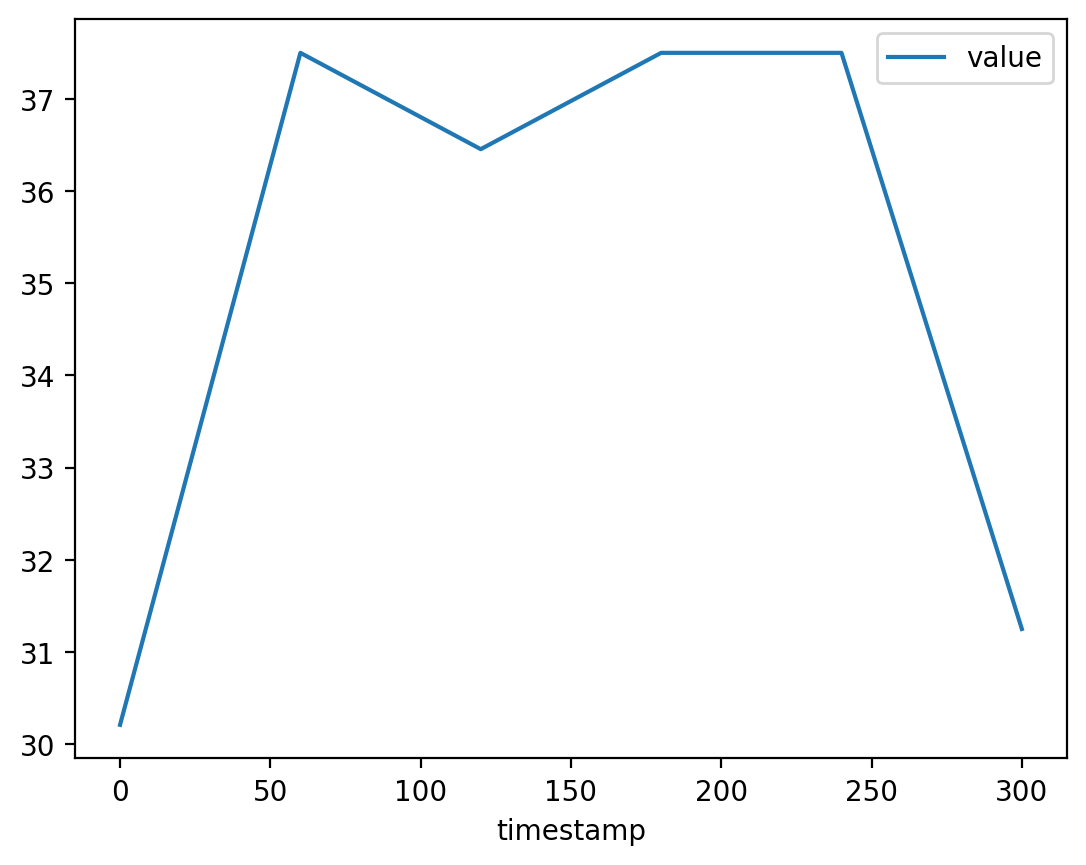

In [226]:
df_metrics.query("metric_name=='validation:accuracy'").plot(x='timestamp', y='value')

<a name='c2w2-2.2.'></a>
### 2.2. Analyze Debugger results

In [227]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}?prefix={}/">S3 debugger output data</a></b>'.format(
            bucket, training_job_name
        )
    )
)

<a name='c2w2-2.3.'></a>
### 2.3. Download SageMaker debugger profiling report

In [228]:
profiler_report_s3_uri = "s3://{}/{}/rule-output/ProfilerReport/profiler-output".format(bucket, training_job_name)

In [229]:
!aws s3 ls $profiler_report_s3_uri/

                           PRE profiler-reports/
2022-09-27 01:14:02     375348 profiler-report.html
2022-09-27 01:14:02     223251 profiler-report.ipynb


In [230]:
!aws s3 cp --recursive $profiler_report_s3_uri ./profiler_report/

download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-09-27-01-05-16-005/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to profiler_report/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-09-27-01-05-16-005/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json to profiler_report/profiler-reports/OverallFrameworkMetrics.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-09-27-01-05-16-005/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to profiler_report/profiler-report.ipynb
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-09-27-01-05-16-005/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to profiler_report/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-09-27-01-05-16-005/rule-output/ProfilerReport/

In [231]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="./profiler_report/profiler-report.html">profiler report</a></b>'))

In [232]:
import time

pytorch_endpoint_name = '{}-{}-{}'.format(training_job_name, 'pt', timestamp)

print(pytorch_endpoint_name)

pytorch-training-2022-09-27-01-05-16-005-pt-1663987302


In [233]:
%%time

predictor = model.deploy(initial_instance_count=1, 
                         instance_type='ml.m5.large', 
                         endpoint_name=pytorch_endpoint_name)

NameError: name 'model' is not defined

In [ ]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/endpoints/{}">SageMaker REST Endpoint</a></b>'.format(region, pytorch_endpoint_name)))